# Define the Function for Classification

In [1]:
import os
import cv2
import mediapipe as mp
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

In [2]:
gpu_devices = tf.config.experimental.list_physical_devices("GPU")
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [3]:
def extract_feature(input_image, is_a_frame):
    if is_a_frame == False:
        mp_hands = mp.solutions.hands
        mp_drawing = mp.solutions.drawing_utils 
        image = cv2.imread(input_image)
        with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
            results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))
            image_height, image_width, _ = image.shape
            annotated_image = cv2.flip(image.copy(), 1)
            # Print handedness (left v.s. right hand).
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Handedness of {input_image}:')
            #print(results.multi_handedness)

            # Draw hand landmarks of each hand.
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Hand landmarks of {input_image}:')
            if not results.multi_hand_landmarks:
                # Here we will set whole landmarks into zero as no handpose detected
                # in a picture wanted to extract.
                
                # Wrist Hand
                wristX = 0
                wristY = 0
                wristZ = 0
                
                # Thumb Finger
                thumb_CmcX = 0
                thumb_CmcY = 0
                thumb_CmcZ = 0
                
                thumb_McpX = 0
                thumb_McpY = 0
                thumb_McpZ = 0
                
                thumb_IpX = 0
                thumb_IpY = 0
                thumb_IpZ = 0
                
                thumb_TipX = 0
                thumb_TipY = 0
                thumb_TipZ = 0

                # Index Finger
                index_McpX = 0
                index_McpY = 0
                index_McpZ = 0
                
                index_PipX = 0
                index_PipY = 0
                index_PipZ = 0
                
                index_DipX = 0
                index_DipY = 0
                index_DipZ = 0
                
                index_TipX = 0
                index_TipY = 0
                index_TipZ = 0

                # Middle Finger
                middle_McpX = 0
                middle_McpY = 0
                middle_McpZ = 0
                
                middle_PipX = 0
                middle_PipY = 0
                middle_PipZ = 0
                
                middle_DipX = 0
                middle_DipY = 0
                middle_DipZ = 0
                
                middle_TipX = 0
                middle_TipY = 0
                middle_TipZ = 0

                # Ring Finger
                ring_McpX = 0
                ring_McpY = 0
                ring_McpZ = 0
                
                ring_PipX = 0
                ring_PipY = 0
                ring_PipZ = 0
                
                ring_DipX = 0
                ring_DipY = 0
                ring_DipZ = 0
                
                ring_TipX = 0
                ring_TipY = 0
                ring_TipZ = 0

                # Pinky Finger
                pinky_McpX = 0
                pinky_McpY = 0
                pinky_McpZ = 0
                
                pinky_PipX = 0
                pinky_PipY = 0
                pinky_PipZ = 0
                
                pinky_DipX = 0
                pinky_DipY = 0
                pinky_DipZ = 0
                
                pinky_TipX = 0
                pinky_TipY = 0
                pinky_TipZ = 0
                
                # Set image to Zero
                annotated_image = 0

                # Return Whole Landmark and Image
                return (wristX, wristY, wristZ,
                        thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                        thumb_McpX, thumb_McpY, thumb_McpZ,
                        thumb_IpX, thumb_IpY, thumb_IpZ,
                        thumb_TipX, thumb_TipY, thumb_TipZ,
                        index_McpX, index_McpY, index_McpZ,
                        index_PipX, index_PipY, index_PipZ,
                        index_DipX, index_DipY, index_DipZ,
                        index_TipX, index_TipY, index_TipZ,
                        middle_McpX, middle_McpY, middle_McpZ,
                        middle_PipX, middle_PipY, middle_PipZ,
                        middle_DipX, middle_DipY, middle_DipZ,
                        middle_TipX, middle_TipY, middle_TipZ,
                        ring_McpX, ring_McpY, ring_McpZ,
                        ring_PipX, ring_PipY, ring_PipZ,
                        ring_DipX, ring_DipY, ring_DipZ,
                        ring_TipX, ring_TipY, ring_TipZ,
                        pinky_McpX, pinky_McpY, pinky_McpZ,
                        pinky_PipX, pinky_PipY, pinky_PipZ,
                        pinky_DipX, pinky_DipY, pinky_DipZ,
                        pinky_TipX, pinky_TipY, pinky_TipZ,
                        annotated_image)
            
            for hand_landmarks in results.multi_hand_landmarks:
                # Wrist Hand /  Pergelangan Tangan
                wristX = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
                wristY = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
                wristZ = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].z

                # Thumb Finger / Ibu Jari
                thumb_CmcX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
                thumb_CmcY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
                thumb_CmcZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].z
                
                thumb_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
                thumb_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
                thumb_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].z
                
                thumb_IpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
                thumb_IpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
                thumb_IpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].z
                
                thumb_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
                thumb_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
                thumb_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].z

                # Index Finger / Jari Telunjuk
                index_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
                index_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
                index_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].z
                
                index_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
                index_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
                index_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].z
                
                index_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
                index_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
                index_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].z
                
                index_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
                index_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
                index_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].z

                # Middle Finger / Jari Tengah
                middle_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
                middle_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
                middle_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].z
                
                middle_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
                middle_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
                middle_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].z
                
                middle_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
                middle_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
                middle_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].z
                
                middle_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
                middle_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
                middle_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].z

                # Ring Finger / Jari Cincin
                ring_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
                ring_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
                ring_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].z
                
                ring_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
                ring_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
                ring_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].z
                
                ring_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
                ring_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
                ring_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].z
                
                ring_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
                ring_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
                ring_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].z

                # Pinky Finger / Jari Kelingking
                pinky_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
                pinky_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
                pinky_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].z
                
                pinky_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
                pinky_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
                pinky_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].z
                
                pinky_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
                pinky_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
                pinky_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].z
                
                pinky_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
                pinky_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height
                pinky_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].z

                # Draw the Skeleton
                mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                
            return (wristX, wristY, wristZ,
                    thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                    thumb_McpX, thumb_McpY, thumb_McpZ,
                    thumb_IpX, thumb_IpY, thumb_IpZ,
                    thumb_TipX, thumb_TipY, thumb_TipZ,
                    index_McpX, index_McpY, index_McpZ,
                    index_PipX, index_PipY, index_PipZ,
                    index_DipX, index_DipY, index_DipZ,
                    index_TipX, index_TipY, index_TipZ,
                    middle_McpX, middle_McpY, middle_McpZ,
                    middle_PipX, middle_PipY, middle_PipZ,
                    middle_DipX, middle_DipY, middle_DipZ,
                    middle_TipX, middle_TipY, middle_TipZ,
                    ring_McpX, ring_McpY, ring_McpZ,
                    ring_PipX, ring_PipY, ring_PipZ,
                    ring_DipX, ring_DipY, ring_DipZ,
                    ring_TipX, ring_TipY, ring_TipZ,
                    pinky_McpX, pinky_McpY, pinky_McpZ,
                    pinky_PipX, pinky_PipY, pinky_PipZ,
                    pinky_DipX, pinky_DipY, pinky_DipZ,
                    pinky_TipX, pinky_TipY, pinky_TipZ,
                    annotated_image)
        
    else:
        mp_hands = mp.solutions.hands
        hands = mp_hands.Hands()
        mp_drawing = mp.solutions.drawing_utils 
        image = input_image
        results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))
        image_height, image_width, _ = image.shape
        annotated_image = cv2.flip(image.copy(), 1)
        # Print handedness (left v.s. right hand).
        # Caution : Uncomment these print command will resulting long log of mediapipe log
        #print(f'Handedness of {input_image}:')
        #print(results.multi_handedness)

        # Draw hand landmarks of each hand.
        # Caution : Uncomment these print command will resulting long log of mediapipe log
        #print(f'Hand landmarks of {input_image}:')
        if results.multi_hand_landmarks:     
            for hand_landmarks in results.multi_hand_landmarks:
                # Wrist Hand /  Pergelangan Tangan
                wristX = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
                wristY = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
                wristZ = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].z

                # Thumb Finger / Ibu Jari
                thumb_CmcX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
                thumb_CmcY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
                thumb_CmcZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].z
                
                thumb_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
                thumb_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
                thumb_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].z
                
                thumb_IpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
                thumb_IpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
                thumb_IpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].z
                
                thumb_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
                thumb_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
                thumb_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].z

                # Index Finger / Jari Telunjuk
                index_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
                index_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
                index_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].z
                
                index_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
                index_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
                index_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].z
                
                index_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
                index_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
                index_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].z
                
                index_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
                index_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
                index_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].z

                # Middle Finger / Jari Tengah
                middle_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
                middle_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
                middle_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].z
                
                middle_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
                middle_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
                middle_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].z
                
                middle_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
                middle_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
                middle_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].z
                
                middle_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
                middle_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
                middle_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].z

                # Ring Finger / Jari Cincin
                ring_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
                ring_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
                ring_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].z
                
                ring_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
                ring_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
                ring_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].z
                
                ring_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
                ring_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
                ring_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].z
                
                ring_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
                ring_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
                ring_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].z

                # Pinky Finger / Jari Kelingking
                pinky_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
                pinky_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
                pinky_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].z
                
                pinky_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
                pinky_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
                pinky_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].z
                
                pinky_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
                pinky_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
                pinky_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].z
                
                pinky_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
                pinky_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height
                pinky_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].z

                # Draw the Skeleton
                mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                
            return (wristX, wristY, wristZ,
                    thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                    thumb_McpX, thumb_McpY, thumb_McpZ,
                    thumb_IpX, thumb_IpY, thumb_IpZ,
                    thumb_TipX, thumb_TipY, thumb_TipZ,
                    index_McpX, index_McpY, index_McpZ,
                    index_PipX, index_PipY, index_PipZ,
                    index_DipX, index_DipY, index_DipZ,
                    index_TipX, index_TipY, index_TipZ,
                    middle_McpX, middle_McpY, middle_McpZ,
                    middle_PipX, middle_PipY, middle_PipZ,
                    middle_DipX, middle_DipY, middle_DipZ,
                    middle_TipX, middle_TipY, middle_TipZ,
                    ring_McpX, ring_McpY, ring_McpZ,
                    ring_PipX, ring_PipY, ring_PipZ,
                    ring_DipX, ring_DipY, ring_DipZ,
                    ring_TipX, ring_TipY, ring_TipZ,
                    pinky_McpX, pinky_McpY, pinky_McpZ,
                    pinky_PipX, pinky_PipY, pinky_PipZ,
                    pinky_DipX, pinky_DipY, pinky_DipZ,
                    pinky_TipX, pinky_TipY, pinky_TipZ,
                    annotated_image)
        else:
            # Here we will set whole landmarks into zero as no handpose detected
            # in a picture wanted to extract.
                
            # Wrist Hand
            wristX = 0
            wristY = 0
            wristZ = 0
                
            # Thumb Finger
            thumb_CmcX = 0
            thumb_CmcY = 0
            thumb_CmcZ = 0
                
            thumb_McpX = 0
            thumb_McpY = 0
            thumb_McpZ = 0
                
            thumb_IpX = 0
            thumb_IpY = 0
            thumb_IpZ = 0
                
            thumb_TipX = 0
            thumb_TipY = 0
            thumb_TipZ = 0

            # Index Finger
            index_McpX = 0
            index_McpY = 0
            index_McpZ = 0
                
            index_PipX = 0
            index_PipY = 0
            index_PipZ = 0
                
            index_DipX = 0
            index_DipY = 0
            index_DipZ = 0
                
            index_TipX = 0
            index_TipY = 0
            index_TipZ = 0

            # Middle Finger
            middle_McpX = 0
            middle_McpY = 0
            middle_McpZ = 0
                
            middle_PipX = 0
            middle_PipY = 0
            middle_PipZ = 0
                
            middle_DipX = 0
            middle_DipY = 0
            middle_DipZ = 0
                
            middle_TipX = 0
            middle_TipY = 0
            middle_TipZ = 0

            # Ring Finger
            ring_McpX = 0
            ring_McpY = 0
            ring_McpZ = 0
                
            ring_PipX = 0
            ring_PipY = 0
            ring_PipZ = 0
                
            ring_DipX = 0
            ring_DipY = 0
            ring_DipZ = 0
                
            ring_TipX = 0
            ring_TipY = 0
            ring_TipZ = 0

            # Pinky Finger
            pinky_McpX = 0
            pinky_McpY = 0
            pinky_McpZ = 0
                
            pinky_PipX = 0
            pinky_PipY = 0
            pinky_PipZ = 0
                
            pinky_DipX = 0
            pinky_DipY = 0
            pinky_DipZ = 0
                
            pinky_TipX = 0
            pinky_TipY = 0
            pinky_TipZ = 0
                
            # Set image to Zero
            annotated_image = 0

            # Return Whole Landmark and Image
            return (wristX, wristY, wristZ,
                    thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                    thumb_McpX, thumb_McpY, thumb_McpZ,
                    thumb_IpX, thumb_IpY, thumb_IpZ,
                    thumb_TipX, thumb_TipY, thumb_TipZ,
                    index_McpX, index_McpY, index_McpZ,
                    index_PipX, index_PipY, index_PipZ,
                    index_DipX, index_DipY, index_DipZ,
                    index_TipX, index_TipY, index_TipZ,
                    middle_McpX, middle_McpY, middle_McpZ,
                    middle_PipX, middle_PipY, middle_PipZ,
                    middle_DipX, middle_DipY, middle_DipZ,
                    middle_TipX, middle_TipY, middle_TipZ,
                    ring_McpX, ring_McpY, ring_McpZ,
                    ring_PipX, ring_PipY, ring_PipZ,
                    ring_DipX, ring_DipY, ring_DipZ,
                    ring_TipX, ring_TipY, ring_TipZ,
                    pinky_McpX, pinky_McpY, pinky_McpZ,
                    pinky_PipX, pinky_PipY, pinky_PipZ,
                    pinky_DipX, pinky_DipY, pinky_DipZ,
                    pinky_TipX, pinky_TipY, pinky_TipZ,
                    annotated_image)

In [4]:
#Define Classes in Dictionary and Load Created Model Previously
classes = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16,
    'R': 17,
    'S': 18,
    'T': 19,
    'U': 20,
    'V': 21,
    'W': 22,
    'X': 23,
    'Y': 24,
    'Z': 25
}

model = tf.keras.models.load_model('model_SIBI.h5')
model.summary()

Model: "SIBI_ML_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 63, 32)            192       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 63, 32)            5152      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 31, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 31, 64)            10304     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 31, 64)            20544     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 15, 128)         

# Using Static Image for Classification

1093.9524173736572 1636.9690895080566 -4.124329677779315e-07 862.8066778182983 1446.0484981536865 -0.054976120591163635 694.6151256561279 1197.3985433578491 -0.08642937988042831 565.2203559875488 966.9811725616455 -0.11998309195041656 405.7702422142029 845.4347252845764 -0.15230193734169006 942.0790076255798 930.3823113441467 -0.020646419376134872 938.2429718971252 638.9151811599731 -0.06445914506912231 930.1618337631226 476.6107499599457 -0.09017083048820496 926.4440536499023 323.02725315093994 -0.11048184335231781 1099.637508392334 963.4392261505127 -0.0254824236035347 1119.5228099822998 773.9381194114685 -0.11022663861513138 1077.5326490402222 1025.5951881408691 -0.12329334765672684 1065.3377771377563 1171.911120414734 -0.10885604470968246 1250.085949897766 1040.403127670288 -0.039387430995702744 1273.4209299087524 892.0885920524597 -0.12452477961778641 1200.2266645431519 1120.7177639007568 -0.10097396373748779 1170.160174369812 1240.0822639465332 -0.059933390468358994 1394.22416687

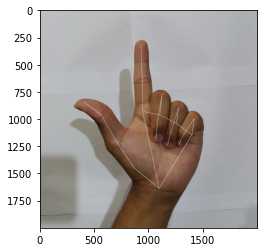

In [6]:
#Load Image and do Feature Extraction
path_to_image = "L (3).jpg"
is_a_frame = False
(wristX, wristY, wristZ,
 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
 thumb_McpX, thumb_McpY, thumb_McpZ,
 thumb_IpX, thumb_IpY, thumb_IpZ,
 thumb_TipX, thumb_TipY, thumb_TipZ,
 index_McpX, index_McpY, index_McpZ,
 index_PipX, index_PipY, index_PipZ,
 index_DipX, index_DipY, index_DipZ,
 index_TipX, index_TipY, index_TipZ,
 middle_McpX, middle_McpY, middle_McpZ,
 middle_PipX, middle_PipY, middle_PipZ,
 middle_DipX, middle_DipY, middle_DipZ,
 middle_TipX, middle_TipY, middle_TipZ,
 ring_McpX, ring_McpY, ring_McpZ,
 ring_PipX, ring_PipY, ring_PipZ,
 ring_DipX, ring_DipY, ring_DipZ,
 ring_TipX, ring_TipY, ring_TipZ,
 pinky_McpX, pinky_McpY, pinky_McpZ,
 pinky_PipX, pinky_PipY, pinky_PipZ,
 pinky_DipX, pinky_DipY, pinky_DipZ,
 pinky_TipX, pinky_TipY, pinky_TipZ,
 output_IMG) = extract_feature(path_to_image, is_a_frame)
print(wristX, wristY, wristZ,
 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
 thumb_McpX, thumb_McpY, thumb_McpZ,
 thumb_IpX, thumb_IpY, thumb_IpZ,
 thumb_TipX, thumb_TipY, thumb_TipZ,
 index_McpX, index_McpY, index_McpZ,
 index_PipX, index_PipY, index_PipZ,
 index_DipX, index_DipY, index_DipZ,
 index_TipX, index_TipY, index_TipZ,
 middle_McpX, middle_McpY, middle_McpZ,
 middle_PipX, middle_PipY, middle_PipZ,
 middle_DipX, middle_DipY, middle_DipZ,
 middle_TipX, middle_TipY, middle_TipZ,
 ring_McpX, ring_McpY, ring_McpZ,
 ring_PipX, ring_PipY, ring_PipZ,
 ring_DipX, ring_DipY, ring_DipZ,
 ring_TipX, ring_TipY, ring_TipZ,
 pinky_McpX, pinky_McpY, pinky_McpZ,
 pinky_PipX, pinky_PipY, pinky_PipZ,
 pinky_DipX, pinky_DipY, pinky_DipZ,
 pinky_TipX, pinky_TipY, pinky_TipZ)
plt.axis("on")
plt.imshow(cv2.cvtColor(output_IMG, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
#Shape the image features into an 1x3 array.
input_IMG = [[[wristX], [wristY], [wristZ],
              [thumb_CmcX], [thumb_CmcY], [thumb_CmcZ],
              [thumb_McpX], [thumb_McpY], [thumb_McpZ], 
              [thumb_IpX], [thumb_IpY], [thumb_IpZ], 
              [thumb_TipX], [thumb_TipY], [thumb_TipZ],
              [index_McpX], [index_McpY], [index_McpZ],
              [index_PipX], [index_PipY], [index_PipZ],
              [index_DipX], [index_DipY], [index_DipZ],
              [index_TipX], [index_TipY], [index_TipZ],
              [middle_McpX], [middle_McpY], [middle_McpZ],
              [middle_PipX], [middle_PipY], [middle_PipZ],
              [middle_DipX], [middle_DipY], [middle_DipZ],
              [middle_TipX], [middle_TipY], [middle_TipZ],
              [ring_McpX], [ring_McpY], [ring_McpZ],
              [ring_PipX], [ring_PipY], [ring_PipZ], 
              [ring_DipX], [ring_DipY], [ring_DipZ], 
              [ring_TipX], [ring_TipY], [ring_TipZ],
              [pinky_McpX], [pinky_McpY], [pinky_McpZ], 
              [pinky_PipX], [pinky_PipY], [pinky_PipZ],
              [pinky_DipX], [pinky_DipY], [pinky_DipZ], 
              [pinky_TipX], [pinky_TipY], [pinky_TipZ]]]
IMG_array = np.array(input_IMG)
IMG_array = IMG_array/255.0
print(IMG_array.shape)
print(IMG_array)

(1, 63, 1)
[[[ 4.29000948e+00]
  [ 6.41948663e+00]
  [-1.61738419e-09]
  [ 3.38355560e+00]
  [ 5.67077842e+00]
  [-2.15592630e-04]
  [ 2.72398088e+00]
  [ 4.69568056e+00]
  [-3.38938745e-04]
  [ 2.21655042e+00]
  [ 3.79208303e+00]
  [-4.70521929e-04]
  [ 1.59125585e+00]
  [ 3.31543030e+00]
  [-5.97262499e-04]
  [ 3.69442748e+00]
  [ 3.64855808e+00]
  [-8.09663505e-05]
  [ 3.67938420e+00]
  [ 2.50554973e+00]
  [-2.52780961e-04]
  [ 3.64769347e+00]
  [ 1.86906176e+00]
  [-3.53611100e-04]
  [ 3.63311394e+00]
  [ 1.26677354e+00]
  [-4.33262131e-04]
  [ 4.31230395e+00]
  [ 3.77819304e+00]
  [-9.99310730e-05]
  [ 4.39028553e+00]
  [ 3.03505145e+00]
  [-4.32261328e-04]
  [ 4.22561823e+00]
  [ 4.02194191e+00]
  [-4.83503324e-04]
  [ 4.17779520e+00]
  [ 4.59572988e+00]
  [-4.26886450e-04]
  [ 4.90229784e+00]
  [ 4.08001227e+00]
  [-1.54460514e-04]
  [ 4.99380757e+00]
  [ 3.49838664e+00]
  [-4.88332469e-04]
  [ 4.70677123e+00]
  [ 4.39497162e+00]
  [-3.95976328e-04]
  [ 4.58886343e+00]
  [ 4.863

In [10]:
#Print the Prediction
print(model.predict(IMG_array))
print(model.predict_classes(IMG_array))
print(np.argmax(model.predict(IMG_array)))

[[5.7506290e-38 0.0000000e+00 0.0000000e+00 1.5782307e-34 0.0000000e+00
  1.7694565e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.5334213e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
[11]
11


In [12]:
#Print prediction using defined Classes
predictions = np.argmax(model.predict(IMG_array))
for alphabets, values in classes.items():
    if values == predictions :
        print(alphabets)

L


# Using Dynamic Images aka Video Webcam for Classification

## Using Function, Slow

In [31]:
cap = cv2.VideoCapture(0)
is_a_frame = True

pTime = 0
cTime = 0

while True:
    success, img = cap.read()
    (wristX, wristY, wristZ,
     thumb_CmcX, thumb_CmcY, thumb_CmcZ,
     thumb_McpX, thumb_McpY, thumb_McpZ,
     thumb_IpX, thumb_IpY, thumb_IpZ,
     thumb_TipX, thumb_TipY, thumb_TipZ,
     index_McpX, index_McpY, index_McpZ,
     index_PipX, index_PipY, index_PipZ,
     index_DipX, index_DipY, index_DipZ,
     index_TipX, index_TipY, index_TipZ,
     middle_McpX, middle_McpY, middle_McpZ,
     middle_PipX, middle_PipY, middle_PipZ,
     middle_DipX, middle_DipY, middle_DipZ,
     middle_TipX, middle_TipY, middle_TipZ,
     ring_McpX, ring_McpY, ring_McpZ,
     ring_PipX, ring_PipY, ring_PipZ,
     ring_DipX, ring_DipY, ring_DipZ,
     ring_TipX, ring_TipY, ring_TipZ,
     pinky_McpX, pinky_McpY, pinky_McpZ,
     pinky_PipX, pinky_PipY, pinky_PipZ,
     pinky_DipX, pinky_DipY, pinky_DipZ,
     pinky_TipX, pinky_TipY, pinky_TipZ,
     output_IMG) = extract_feature(img, is_a_frame)
    
    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime
    
    if output_IMG == 0:
        output_IMG =  img
    else:
        pass
    
    cv2.putText(output_IMG, str(int(fps)), (10, 70), cv2.FONT_HERSHEY_PLAIN, 3,
                (255, 0, 255), 3)
    
    input_IMG = [[[wristX], [wristY], [wristZ],
                  [thumb_CmcX], [thumb_CmcY], [thumb_CmcZ],
                  [thumb_McpX], [thumb_McpY], [thumb_McpZ], 
                  [thumb_IpX], [thumb_IpY], [thumb_IpZ], 
                  [thumb_TipX], [thumb_TipY], [thumb_TipZ],
                  [index_McpX], [index_McpY], [index_McpZ],
                  [index_PipX], [index_PipY], [index_PipZ],
                  [index_DipX], [index_DipY], [index_DipZ],
                  [index_TipX], [index_TipY], [index_TipZ],
                  [middle_McpX], [middle_McpY], [middle_McpZ],
                  [middle_PipX], [middle_PipY], [middle_PipZ],
                  [middle_DipX], [middle_DipY], [middle_DipZ],
                  [middle_TipX], [middle_TipY], [middle_TipZ],
                  [ring_McpX], [ring_McpY], [ring_McpZ],
                  [ring_PipX], [ring_PipY], [ring_PipZ], 
                  [ring_DipX], [ring_DipY], [ring_DipZ], 
                  [ring_TipX], [ring_TipY], [ring_TipZ],
                  [pinky_McpX], [pinky_McpY], [pinky_McpZ], 
                  [pinky_PipX], [pinky_PipY], [pinky_PipZ],
                  [pinky_DipX], [pinky_DipY], [pinky_DipZ], 
                  [pinky_TipX], [pinky_TipY], [pinky_TipZ]]]
    IMG_array = np.array(input_IMG)
    IMG_array.shape
    predictions = model.predict_classes(IMG_array)
    for alphabets, values in classes.items():
        if values == predictions[0] :
            text_prediction = alphabets
    cv2.putText(output_IMG, str(text_prediction), (70, 70), cv2.FONT_HERSHEY_PLAIN, 3,
                (255, 0, 255), 3)
    
    cv2.imshow("Image", output_IMG)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

cap.release()
cv2.destroyAllWindows()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Alternative, Faster

In [5]:
import cv2
import mediapipe as mp
import time
 
cap = cv2.VideoCapture(0)
 
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils
 
pTime = 0
cTime = 0

#Define the Input for the Inference
# Wrist Hand
wristX = 0
wristY = 0
wristZ = 0
                
# Thumb Finger
thumb_CmcX = 0
thumb_CmcY = 0
thumb_CmcZ = 0

thumb_McpX = 0
thumb_McpY = 0
thumb_McpZ = 0
                
thumb_IpX = 0
thumb_IpY = 0
thumb_IpZ = 0
                
thumb_TipX = 0
thumb_TipY = 0
thumb_TipZ = 0

# Index Finger
index_McpX = 0
index_McpY = 0
index_McpZ = 0
                
index_PipX = 0
index_PipY = 0
index_PipZ = 0
                
index_DipX = 0
index_DipY = 0
index_DipZ = 0
                
index_TipX = 0
index_TipY = 0
index_TipZ = 0

# Middle Finger
middle_McpX = 0
middle_McpY = 0
middle_McpZ = 0
                
middle_PipX = 0
middle_PipY = 0
middle_PipZ = 0
                
middle_DipX = 0
middle_DipY = 0
middle_DipZ = 0
                
middle_TipX = 0
middle_TipY = 0
middle_TipZ = 0

# Ring Finger
ring_McpX = 0
ring_McpY = 0
ring_McpZ = 0
                
ring_PipX = 0
ring_PipY = 0
ring_PipZ = 0
                
ring_DipX = 0
ring_DipY = 0
ring_DipZ = 0
                
ring_TipX = 0
ring_TipY = 0
ring_TipZ = 0

# Pinky Finger
pinky_McpX = 0
pinky_McpY = 0
pinky_McpZ = 0
                
pinky_PipX = 0
pinky_PipY = 0
pinky_PipZ = 0
                
pinky_DipX = 0
pinky_DipY = 0
pinky_DipZ = 0
                
pinky_TipX = 0
pinky_TipY = 0
pinky_TipZ = 0

while True:
    success, img = cap.read()
    results = hands.process(cv2.flip(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 1))
    image_height, image_width, _ = img.shape
    # print(results.multi_hand_landmarks)
    img = cv2.flip(img.copy(), 1)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Wrist Hand /  Pergelangan Tangan
            wristX = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
            wristY = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
            wristZ = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].z

            # Thumb Finger / Ibu Jari
            thumb_CmcX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
            thumb_CmcY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
            thumb_CmcZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].z
                
            thumb_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
            thumb_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
            thumb_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].z
                
            thumb_IpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
            thumb_IpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
            thumb_IpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].z
                
            thumb_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
            thumb_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
            thumb_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].z

            # Index Finger / Jari Telunjuk
            index_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
            index_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
            index_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].z
                
            index_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
            index_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
            index_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].z
                
            index_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
            index_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
            index_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].z
                
            index_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
            index_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
            index_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].z

            # Middle Finger / Jari Tengah
            middle_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
            middle_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
            middle_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].z
                
            middle_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
            middle_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
            middle_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].z
                
            middle_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
            middle_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
            middle_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].z
                
            middle_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
            middle_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
            middle_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].z

            # Ring Finger / Jari Cincin
            ring_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
            ring_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
            ring_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].z
                
            ring_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
            ring_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
            ring_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].z
                
            ring_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
            ring_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
            ring_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].z
                
            ring_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
            ring_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
            ring_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].z

            # Pinky Finger / Jari Kelingking
            pinky_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
            pinky_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
            pinky_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].z
                
            pinky_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
            pinky_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
            pinky_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].z
                
            pinky_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
            pinky_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
            pinky_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].z
                
            pinky_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
            pinky_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height
            pinky_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].z

            # Draw the Skeleton
            mp_drawing.draw_landmarks(img, hand_landmarks, mp_hands.HAND_CONNECTIONS)
 
    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime
    cv2.putText(img, str(int(fps)), (10, 70), cv2.FONT_HERSHEY_PLAIN, 3,
                (255, 0, 255), 3)
    
    input_IMG = [[[wristX], [wristY], [wristZ],
                  [thumb_CmcX], [thumb_CmcY], [thumb_CmcZ],
                  [thumb_McpX], [thumb_McpY], [thumb_McpZ], 
                  [thumb_IpX], [thumb_IpY], [thumb_IpZ], 
                  [thumb_TipX], [thumb_TipY], [thumb_TipZ],
                  [index_McpX], [index_McpY], [index_McpZ],
                  [index_PipX], [index_PipY], [index_PipZ],
                  [index_DipX], [index_DipY], [index_DipZ],
                  [index_TipX], [index_TipY], [index_TipZ],
                  [middle_McpX], [middle_McpY], [middle_McpZ],
                  [middle_PipX], [middle_PipY], [middle_PipZ],
                  [middle_DipX], [middle_DipY], [middle_DipZ],
                  [middle_TipX], [middle_TipY], [middle_TipZ],
                  [ring_McpX], [ring_McpY], [ring_McpZ],
                  [ring_PipX], [ring_PipY], [ring_PipZ], 
                  [ring_DipX], [ring_DipY], [ring_DipZ], 
                  [ring_TipX], [ring_TipY], [ring_TipZ],
                  [pinky_McpX], [pinky_McpY], [pinky_McpZ], 
                  [pinky_PipX], [pinky_PipY], [pinky_PipZ],
                  [pinky_DipX], [pinky_DipY], [pinky_DipZ], 
                  [pinky_TipX], [pinky_TipY], [pinky_TipZ]]]
    IMG_array = np.array(input_IMG)
    IMG_array.shape
    predictions = np.argmax(model.predict(IMG_array))
    for alphabets, values in classes.items():
        if values == predictions :
            text_prediction = alphabets
    cv2.putText(img, str(text_prediction), (90, 70), cv2.FONT_HERSHEY_PLAIN, 3,
                (255, 0, 255), 3)
    cv2.imshow("Image", img)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

cap.release()
cv2.destroyAllWindows()